## Email spam , ham

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv(r"C:\Users\USER_PC_SA\Desktop\Classification\Data\spam.csv")
my_data = df.copy()
my_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [75]:
label = my_data["Category"].value_counts()
label

ham     4825
spam     747
Name: Category, dtype: int64

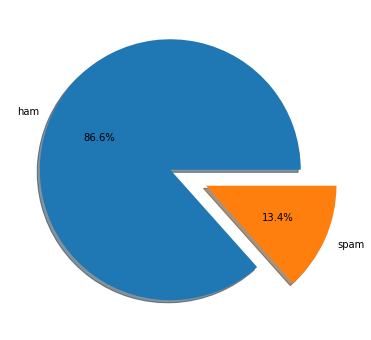

In [80]:
plt.figure(figsize=(10 , 6))
plt.pie([4825 , 747] , labels=("ham" , "spam") , autopct="%1.1f%%" , explode= (0 , 0.3) , shadow=True)
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


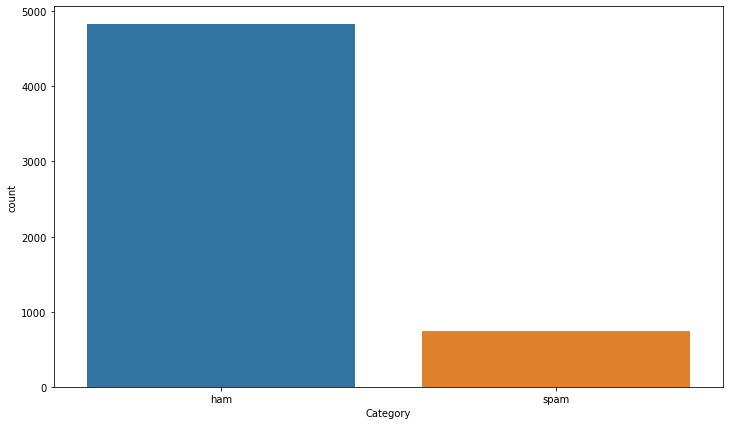

In [78]:
plt.figure(figsize=(12 , 7))

sns.countplot(my_data["Category"])
plt.show()

In [41]:
my_data["Category"].replace({"ham" : 1 , "spam" : 0} , inplace=True)

In [42]:
X = my_data["Message"]
Y = my_data["Category"]

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size=0.3 , random_state=11)
x_test

4460    Welcome to UK-mobile-date this msg is FREE giv...
1049    I walked an hour 2 c u! doesnt that show I ca...
1810                Aight, I'll ask a few of my roommates
2848    Free-message: Jamster!Get the crazy frog sound...
2428        Do you think i can move  &lt;#&gt;  in a week
                              ...                        
514                             No..jst change tat only..
2560    I also thk too fast... Xy suggest one not me. ...
2454                         How much she payed. Suganya.
2858    Today i'm not workin but not free oso... Gee.....
2237    Pls tell nelson that the bb's are no longer co...
Name: Message, Length: 1672, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_count , y_train)

MultinomialNB()

In [46]:
mnb.score(x_train_count , y_train)

0.9930769230769231

In [47]:
x_test_count = cv.transform(x_test.values)
x_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
mnb.predict(x_test_count)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
mnb.score(x_test_count , y_test)

0.9826555023923444

In [54]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()

In [55]:
lrm.fit(x_train_count , y_train)

LogisticRegression()

In [56]:
lrm.score(x_train_count , y_train)

0.9984615384615385

In [65]:
y_pred = lrm.predict(x_test_count)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
lrm.score(x_test_count ,y_test)

0.9778708133971292

In [61]:
from sklearn.metrics import confusion_matrix

In [68]:
matrix = confusion_matrix(y_test , y_pred)
matrix

array([[ 185,   32],
       [   5, 1450]], dtype=int64)

<AxesSubplot:>

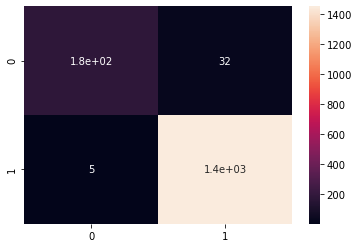

In [79]:
sns.heatmap(matrix , annot=True)

## made by karim abdulnabi ...

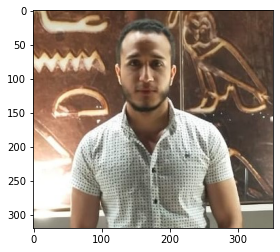

In [2]:
img = plt.imread(r"C:\Users\USER_PC_SA\Desktop\karim1.jpeg")
plt.imshow(img)
plt.show()